In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load Data
cc_2001_2004 = pd.read_csv("data/raw/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
cc_2005_2007 = pd.read_csv("data/raw/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
cc_2008_2011 = pd.read_csv("data/raw/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
cc_2012_2017 = pd.read_csv("data/raw/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

c:\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3508: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1513591: expected 23 fields, saw 24\n'
c:\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3508: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [14]:
# Sanity Check
cc_2001_2004.info()
cc_2001_2004.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [15]:
cc_2005_2007.info()
cc_2005_2007.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872343 entries, 0 to 1872342
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [16]:
cc_2008_2011.info()
cc_2008_2011.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688710 entries, 0 to 2688709
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [17]:
cc_2012_2017.info()
cc_2012_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [30]:
## Initial Cleaning

# Define the list of columns to drop
columns_to_drop = ['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On']

# Define a list of dataframes
dataframes = [cc_2001_2004, cc_2005_2007, cc_2008_2011, cc_2012_2017]

# Iterate through each dataframe
for i, df in enumerate(dataframes, start=1):
    # Drop specified columns
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Drop rows with null values
    df = df.dropna()
    
    # Save the modified dataframe back to the original variable
    globals()[f'cc_{i}_modified'] = df
    
    print(f"Processed cc_{i}")

Processed cc_1
Processed cc_2
Processed cc_3
Processed cc_4


In [31]:
cc_1_modified.info()
cc_1_modified.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892810 entries, 1 to 1923514
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Year                  float64
 6   Latitude              object 
 7   Longitude             float64
 8   Location              object 
dtypes: float64(2), object(7)
memory usage: 144.4+ MB


,Date,Block,Primary Type,Description,Location Description,Year,Latitude,Longitude,Location
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,2003.0,41.817229,-87.637328,"(41.817229156, -87.637328162)"
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,2003.0,41.691785,-87.635116,"(41.691784636, -87.635115968)"
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,2001.0,41.68702,-87.608445,"(41.687020002, -87.60844523)"
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,2003.0,41.729712,-87.653159,"(41.729712374, -87.653158513)"
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,2003.0,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [32]:
# Concatenate the modified and cleaned dataframes
combined_df = pd.concat([cc_1_modified, cc_2_modified, cc_3_modified, cc_4_modified], ignore_index=True)

# Define the output file path
output_file_path = "data/cleaned/Chicago_Crimes_2001_to_2017_modified_and_cleaned.csv"

# Save the concatenated dataframe to a CSV file
combined_df.to_csv(output_file_path, index=False)

print(f"Combined and cleaned dataframe saved to {output_file_path}")

Combined and cleaned dataframe saved to data/cleaned/Chicago_Crimes_2001_to_2017_modified_and_cleaned.csv


In [33]:
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834222 entries, 0 to 7834221
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Year                  float64
 6   Latitude              object 
 7   Longitude             float64
 8   Location              object 
dtypes: float64(2), object(7)
memory usage: 537.9+ MB


,Date,Block,Primary Type,Description,Location Description,Year,Latitude,Longitude,Location
0,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,2003.0,41.817229,-87.637328,"(41.817229156, -87.637328162)"
1,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,2003.0,41.691785,-87.635116,"(41.691784636, -87.635115968)"
2,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,2001.0,41.68702,-87.608445,"(41.687020002, -87.60844523)"
3,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,2003.0,41.729712,-87.653159,"(41.729712374, -87.653158513)"
4,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,2003.0,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [36]:
# Create a copy of the combined dataframe
combined_df_updated = combined_df.copy()

# Extract street name from 'Block' column
combined_df_updated['Street'] = combined_df_updated['Block'].str.replace(r'^.*XX\s', '')

# Drop the 'Block' column
combined_df_updated.drop(columns=['Block'], inplace=True)

# Reorder the columns
column_order = ['Year', 'Date', 'Street', 'Primary Type', 'Description', 'Location Description', 'Latitude', 'Longitude', 'Location']
combined_df_updated = combined_df_updated[column_order]

C:\Users\George Jieh\AppData\Local\Temp\ipykernel_23784\778100274.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_df_updated['Street'] = combined_df_updated['Block'].str.replace(r'^.*XX\s', '')


In [37]:
combined_df_updated.info()
combined_df_updated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834222 entries, 0 to 7834221
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Year                  float64
 1   Date                  object 
 2   Street                object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Latitude              object 
 7   Longitude             float64
 8   Location              object 
dtypes: float64(2), object(7)
memory usage: 537.9+ MB


,Year,Date,Street,Primary Type,Description,Location Description,Latitude,Longitude,Location
0,2003.0,03/01/2003 12:00:00 AM,W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,41.817229,-87.637328,"(41.817229156, -87.637328162)"
1,2003.0,05/01/2003 01:00:00 AM,S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,41.691785,-87.635116,"(41.691784636, -87.635115968)"
2,2001.0,01/01/2001 11:00:00 AM,S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,41.68702,-87.608445,"(41.687020002, -87.60844523)"
3,2003.0,03/15/2003 12:00:00 AM,S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,41.729712,-87.653159,"(41.729712374, -87.653158513)"
4,2003.0,01/01/2003 12:00:00 AM,S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [38]:
# Clean up the 'Year' column
combined_df_updated['Year'] = combined_df_updated['Year'].astype(int)

In [39]:
combined_df_updated.info()
combined_df_updated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834222 entries, 0 to 7834221
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Year                  int32  
 1   Date                  object 
 2   Street                object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Latitude              object 
 7   Longitude             float64
 8   Location              object 
dtypes: float64(1), int32(1), object(7)
memory usage: 508.0+ MB


,Year,Date,Street,Primary Type,Description,Location Description,Latitude,Longitude,Location
0,2003,03/01/2003 12:00:00 AM,W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,41.817229,-87.637328,"(41.817229156, -87.637328162)"
1,2003,05/01/2003 01:00:00 AM,S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,41.691785,-87.635116,"(41.691784636, -87.635115968)"
2,2001,01/01/2001 11:00:00 AM,S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,41.68702,-87.608445,"(41.687020002, -87.60844523)"
3,2003,03/15/2003 12:00:00 AM,S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,41.729712,-87.653159,"(41.729712374, -87.653158513)"
4,2003,01/01/2003 12:00:00 AM,S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [40]:
# Define the output file path
output_updated_file_path = "data/cleaned/Chicago_Crimes_2001_to_2017_modified_and_cleaned_updated.csv"

# Save the updated dataframe to CSV
combined_df_updated.to_csv(output_updated_file_path, index=False)

Now that the dataset is cleaned to a point where we gotten rid of data that isn't important for what we are trying to explore or data that are not descriptive enough for us to work with, we can start exploring what type of crimes that are left and try to narrow it down to only show crimes that will effect an individual's safety when walking down the streets.

In [41]:
# List out unique values in the 'Description' column
unique_descriptions = combined_df_updated['Description'].unique()

# Print the unique descriptions
for description in unique_descriptions:
    print(description)

HARASSMENT BY TELEPHONE
FINANCIAL ID THEFT:$300 &UNDER
PREDATORY
OTHER WEAPONS VIOLATION
FINANCIAL ID THEFT: OVER $300
SEX ASSLT OF CHILD BY FAM MBR
AGG SEX ASSLT OF CHILD FAM MBR
AUTOMOBILE
OVER $500
CRIMINAL SEXUAL ABUSE
CREDIT CARD FRAUD
AGG: FINANCIAL ID THEFT
FRAUD OR CONFIDENCE GAME
AGG CRIM SEX ABUSE FAM MEMBER
NON-AGGRAVATED
AGG CRIMINAL SEXUAL ABUSE
OTHER VEHICLE OFFENSE
EMBEZZLEMENT
TELEPHONE THREAT
AGGRAVATED: OTHER
AGGRAVATED: HANDGUN
FORGERY
ATTEMPT FINANCIAL IDENTITY THEFT
$500 AND UNDER
CRIM SEX ABUSE BY FAM MEMBER
OTHER CRIME AGAINST PERSON
TO VEHICLE
TO LAND
ATT AGG CRIMINAL SEXUAL ABUSE
FROM BUILDING
THEFT OF LABOR/SERVICES
INSURANCE FRAUD
FIRST DEGREE MURDER
OTHER CRIME INVOLVING PROPERTY
SEXUAL EXPLOITATION OF A CHILD
INDECENT SOLICITATION/CHILD
ARMED: OTHER DANGEROUS WEAPON
CHILD ABUSE
SIMPLE
SEX OFFENDER: FAIL TO REGISTER
BY FIRE
FORCIBLE ENTRY
TO PROPERTY
UNLAWFUL POSS OF HANDGUN
AGGRAVATED:KNIFE/CUTTING INSTR
TO STATE SUP PROP
VIOLATE ORDER OF PROTECTION
AGGRAVA

In [42]:
# List out unique values in the 'Primary' column
unique_types = combined_df_updated['Primary Type'].unique()

# Print the unique types
for types in unique_types:
    print(types)

OTHER OFFENSE
THEFT
CRIM SEXUAL ASSAULT
OFFENSE INVOLVING CHILDREN
MOTOR VEHICLE THEFT
SEX OFFENSE
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
CRIMINAL TRESPASS
HOMICIDE
ROBBERY
BATTERY
ARSON
BURGLARY
ASSAULT
WEAPONS VIOLATION
PUBLIC PEACE VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
KIDNAPPING
NARCOTICS
GAMBLING
INTIMIDATION
STALKING
RITUALISM
LIQUOR LAW VIOLATION
PROSTITUTION
DOMESTIC VIOLENCE
OBSCENITY
OTHER NARCOTIC VIOLATION
PUBLIC INDECENCY
NON-CRIMINAL
HUMAN TRAFFICKING
CONCEALED CARRY LICENSE VIOLATION
NON - CRIMINAL
NON-CRIMINAL (SUBJECT SPECIFIED)


In [44]:
# Filter rows where 'Primary Type' is 'Other Offense'
other_offense_df = combined_df_updated[combined_df_updated['Primary Type'] == 'OTHER OFFENSE']

# List out unique values in the 'Description' column for 'Other Offense'
unique_descriptions = other_offense_df['Description'].unique()

# Print the unique descriptions
for description in unique_descriptions:
    print(description)

HARASSMENT BY TELEPHONE
OTHER WEAPONS VIOLATION
OTHER VEHICLE OFFENSE
TELEPHONE THREAT
OTHER CRIME AGAINST PERSON
OTHER CRIME INVOLVING PROPERTY
SEX OFFENDER: FAIL TO REGISTER
VIOLATE ORDER OF PROTECTION
SEX OFFENDER: FAIL REG NEW ADD
OBSCENE TELEPHONE CALLS
HARASSMENT BY ELECTRONIC MEANS
VIO BAIL BOND: DOM VIOLENCE
LICENSE VIOLATION
POSSESSION OF BURGLARY TOOLS
OTHER ARSON/EXPLOSIVE INCIDENT
SEX OFFENDER: PROHIBITED ZONE
INTERFERE W/ HIGHER EDUCATION
ANIMAL FIGHTING
ANIMAL ABUSE/NEGLECT
FALSE/STOLEN/ALTERED TRP
COMPOUNDING A CRIME
TAMPER WITH MOTOR VEHICLE
VEHICLE TITLE/REG OFFENSE
FIREARM REGISTRATION VIOLATION
EAVESDROPPING
PROBATION VIOLATION
ABUSE/NEGLECT: CARE FACILITY
HAZARDOUS MATERIALS VIOLATION
BOARD PLANE WITH WEAPON
PAROLE VIOLATION
UNLAWFUL USE OF BODY ARMOR
MONEY LAUNDERING
VIOLATION OF SMOKING BAN
VIOLATION GPS MONITORING DEVICE
GUN OFFENDER: DUTY TO REGISTER
DISCLOSE DV VICTIM LOCATION
GUN OFFENDER: ANNUAL REGISTRATION
VIOLENT OFFENDER: DUTY TO REGISTER
VIOLATION OF CIV

Looking at what is considered as OTHER OFFENSE, though some of the crimes are quite bad, none of them really effect an individual that is walking ont he street, so I believe they can be excluded from the dataset. 
Also looking at some the general primarcy crime type catergories the following could also be excluded:
- Criminal Trespass
- Interference with Public Officer
- Liquor Law Violation
- Non-Criminal
- Non - Criminal
- Non-Criminal (Subject Specified)

In [48]:
# Define the list of unwanted values in the 'Primary Type' column
unwanted_types = [
    "OTHER OFFENSE",
    "CRIMINAL TRESPASS",
    "INTERFERENCE WITH PUBLIC OFFICER",
    "LIQUOR LAW VIOLATION",
    "NON-CRIMINAL",
    "NON - CRIMINAL",
    "NON-CRIMINAL (SUBJECT SPECIFIED)"
]

# Filter out rows that have 'Primary Type' values in the list of unwanted types
filtered_df = combined_df_updated[~combined_df_updated['Primary Type'].isin(unwanted_types)]

filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7087722 entries, 1 to 7834220
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Year                  int32  
 1   Date                  object 
 2   Street                object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Latitude              object 
 7   Longitude             float64
 8   Location              object 
dtypes: float64(1), int32(1), object(7)
memory usage: 513.7+ MB


,Year,Date,Street,Primary Type,Description,Location Description,Latitude,Longitude,Location
1,2003,05/01/2003 01:00:00 AM,S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,41.691785,-87.635116,"(41.691784636, -87.635115968)"
2,2001,01/01/2001 11:00:00 AM,S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,41.68702,-87.608445,"(41.687020002, -87.60844523)"
4,2003,01/01/2003 12:00:00 AM,S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.869772,-87.708180,"(41.869772159, -87.708180162)"
5,2003,06/05/2003 12:00:00 AM,S WALLACE ST,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.72433,-87.638434,"(41.724330486, -87.638434248)"
6,2003,01/01/2003 12:00:00 AM,S KEELER AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.783164,-87.727773,"(41.783163561, -87.727772951)"


Now let's look at where the crime happened. We only care about public spaces that pedatrials can pass by.

In [45]:
# List out unique values in the 'Location Description' column
unique_locations = combined_df_updated['Location Description'].unique()

# Print the unique types
for locations in unique_locations:
    print(locations)

RESIDENCE
RESIDENCE PORCH/HALLWAY
APARTMENT
OTHER
GAS STATION
COMMERCIAL / BUSINESS OFFICE
STREET
BANK
APPLIANCE STORE
PARKING LOT/GARAGE(NON.RESID.)
CHURCH/SYNAGOGUE/PLACE OF WORSHIP
DAY CARE CENTER
HOSPITAL BUILDING/GROUNDS
HOTEL/MOTEL
SCHOOL, PRIVATE, GROUNDS
VEHICLE NON-COMMERCIAL
ALLEY
SMALL RETAIL STORE
DEPARTMENT STORE
RESTAURANT
MEDICAL/DENTAL OFFICE
CHA STAIRWELL
AUTO
BASEMENT
ABANDONED BUILDING
RETAIL STORE
TAVERN
GAS STATION DRIVE/PROP.
HOTEL
HALLWAY
TRUCK
GANGWAY
PARKING LOT
FACTORY/MANUFACTURING BUILDING
HOUSE
COACH HOUSE
PORCH
CLUB
SCHOOL, PUBLIC, BUILDING
VACANT LOT
YARD
CURRENCY EXCHANGE
SIDEWALK
AIRPORT BUILDING NON-TERMINAL - SECURE AREA
CHA APARTMENT
CAR WASH
CHA PARKING LOT
LOADING DOCK
CHA ELEVATOR
LAKE
RAILROAD PROPERTY
VESTIBULE
CHA HALLWAY
GOVERNMENT BUILDING/PROPERTY
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA
DUMPSTER
GARAGE
FOREST PRESERVE
PARK PROPERTY
CHA PLAY LOT
CHA GROUNDS
HOSPITAL
RIVER
WOODED AREA
COUNTY JAIL
STAIRWELL
YMCA
CHURCH PROPERTY
TAVERN/LIQUOR

Looking at what is available I would say the following can be dropped:
- OTHER
- BASEMENT
- GANGWAY
- FACTORY/MANUFACTURING BUILDING
- AIRPORT BUILDING NON-TERMINAL - SECURE AREA
- LOADING DOCK
- RAILROAD PROPERTY
- AIRPORT TERMINAL UPPER LEVEL - SECURE AREA
- DUMPSTER
- COUNTY JAIL
- AIRPORT/AIRCRAFT
- OTHER RAILROAD PROP / TRAIN DEPOT
- POLICE FACILITY/VEH PARKING LOT
- SAVINGS AND LOAN
- SEWER
- CEMETARY
- JUNK YARD/GARBAGE DUMP
- TRUCKING TERMINAL
- FACTORY
- JAIL / LOCK-UP FACILITY
- AIRCRAFT
- AIRPORT EXTERIOR - NON-SECURE AREA
- AIRPORT PARKING LOT
- AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA
- AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA
- AIRPORT TERMINAL LOWER LEVEL - SECURE AREA
- AIRPORT VENDING ESTABLISHMENT
- AIRPORT EXTERIOR - SECURE AREA
- AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA
- AIRPORT TRANSPORTATION SYSTEM (ATS)
- AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA

These locations are chosen is either they are no descript, or are areas you wouldn't walk past on the streets.

In [50]:
# Define the list of unwanted 'Location Description' values
unwanted_locations = [
    "OTHER", "BASEMENT", "GANGWAY", "FACTORY/MANUFACTURING BUILDING",
    "AIRPORT BUILDING NON-TERMINAL - SECURE AREA", "LOADING DOCK", "RAILROAD PROPERTY",
    "AIRPORT TERMINAL UPPER LEVEL - SECURE AREA", "DUMPSTER", "COUNTY JAIL",
    "AIRPORT/AIRCRAFT", "OTHER RAILROAD PROP / TRAIN DEPOT", "POLICE FACILITY/VEH PARKING LOT",
    "SAVINGS AND LOAN", "SEWER", "CEMETARY", "JUNK YARD/GARBAGE DUMP", "TRUCKING TERMINAL",
    "FACTORY", "JAIL / LOCK-UP FACILITY", "AIRCRAFT", "AIRPORT EXTERIOR - NON-SECURE AREA",
    "AIRPORT PARKING LOT", "AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA",
    "AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA", "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA",
    "AIRPORT VENDING ESTABLISHMENT", "AIRPORT EXTERIOR - SECURE AREA",
    "AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA", "AIRPORT TRANSPORTATION SYSTEM (ATS)",
    "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA"
]

# Filter out rows that have 'Location Description' values in the list of unwanted locations
more_filtered_df = filtered_df[~filtered_df['Location Description'].isin(unwanted_locations)]

# Reset the index of the DataFrame
more_filtered_df = more_filtered_df.reset_index(drop=True)

more_filtered_df.info()
more_filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785535 entries, 0 to 6785534
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Year                  int32  
 1   Date                  object 
 2   Street                object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Latitude              object 
 7   Longitude             float64
 8   Location              object 
dtypes: float64(1), int32(1), object(7)
memory usage: 440.0+ MB


,Year,Date,Street,Primary Type,Description,Location Description,Latitude,Longitude,Location
0,2003,05/01/2003 01:00:00 AM,S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,41.691785,-87.635116,"(41.691784636, -87.635115968)"
1,2001,01/01/2001 11:00:00 AM,S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,41.68702,-87.608445,"(41.687020002, -87.60844523)"
2,2003,01/01/2003 12:00:00 AM,S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.869772,-87.708180,"(41.869772159, -87.708180162)"
3,2003,06/05/2003 12:00:00 AM,S WALLACE ST,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.72433,-87.638434,"(41.724330486, -87.638434248)"
4,2003,01/01/2003 12:00:00 AM,S KEELER AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.783164,-87.727773,"(41.783163561, -87.727772951)"


In [51]:
# Define the output file path
output_updated_file_path = "data/cleaned/Chicago_Crimes_2001_to_2017_pedastrian_related.csv"

# Save the updated dataframe to CSV
more_filtered_df.to_csv(output_updated_file_path, index=False)

Now that the data is prepared, lets look deeper into the crime statistics.

In [52]:
# Load dataset
final_df = pd.read_csv('data/cleaned/Chicago_Crimes_2001_to_2017_pedastrian_related.csv')
final_df.head()

,Year,Date,Street,Primary Type,Description,Location Description,Latitude,Longitude,Location
0,2003,05/01/2003 01:00:00 AM,S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,41.691785,-87.635116,"(41.691784636, -87.635115968)"
1,2001,01/01/2001 11:00:00 AM,S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,41.687020,-87.608445,"(41.687020002, -87.60844523)"
2,2003,01/01/2003 12:00:00 AM,S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.869772,-87.708180,"(41.869772159, -87.708180162)"
3,2003,06/05/2003 12:00:00 AM,S WALLACE ST,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.724330,-87.638434,"(41.724330486, -87.638434248)"
4,2003,01/01/2003 12:00:00 AM,S KEELER AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.783164,-87.727773,"(41.783163561, -87.727772951)"


In [53]:
# Convert the data in the Date column into a format the can help with time-based analysis
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month

final_df.head()

,Year,Date,Street,Primary Type,Description,Location Description,Latitude,Longitude,Location,Month
0,2003,2003-05-01 01:00:00,S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,41.691785,-87.635116,"(41.691784636, -87.635115968)",5
1,2001,2001-01-01 11:00:00,S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,41.687020,-87.608445,"(41.687020002, -87.60844523)",1
2,2003,2003-01-01 00:00:00,S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.869772,-87.708180,"(41.869772159, -87.708180162)",1
3,2003,2003-06-05 00:00:00,S WALLACE ST,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.724330,-87.638434,"(41.724330486, -87.638434248)",6
4,2003,2003-01-01 00:00:00,S KEELER AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,41.783164,-87.727773,"(41.783163561, -87.727772951)",1


In [59]:
# Crime Trends Over Time
from tabulate import tabulate

annual_crimes = final_df.groupby('Year').size()
print("Annual Crime Trends:\n", tabulate(annual_crimes.reset_index(name='Count'), headers='keys', tablefmt='psql'))
biennial_crimes = final_df.groupby(final_df['Year'] // 2 * 2).size()
print("Biennial Crime Trends:\n", tabulate(biennial_crimes.reset_index(name='Count'), headers='keys', tablefmt='psql'))
final_df['Half_Year'] = final_df['Date'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
semi_annual_crimes = final_df.groupby(['Year', 'Half_Year']).size()
print("Semi-Annual Crime Trends:\n", tabulate(semi_annual_crimes.reset_index(name='Count'), headers='keys', tablefmt='psql'))
final_df['Quarter'] = final_df['Date'].dt.quarter
quarterly_crimes = final_df.groupby(['Year', 'Quarter']).size()
print("Quarterly Crime Trends:\n", tabulate(quarterly_crimes.reset_index(name='Count'), headers='keys', tablefmt='psql'))

ModuleNotFoundError: No module named 'tabulate'

In [56]:
# With the time frames set we can utilize it into calculations and see which streets have the most crimes at different time frames
streets_annual = final_df.groupby(['Street', 'Year']).size()
streets_biennial = final_df.groupby(['Street', (final_df['Year'] // 2 * 2)]).size()
streets_semi_annual = final_df.groupby(['Street', 'Year', 'Half_Year']).size()
streets_quarterly = final_df.groupby(['Street', 'Year', 'Quarter']).size()

In [57]:
# Most Common Crime Type Per Street
common_crime_per_street = final_df.groupby('Street')['Primary Type'].agg(lambda x: x.mode()[0])

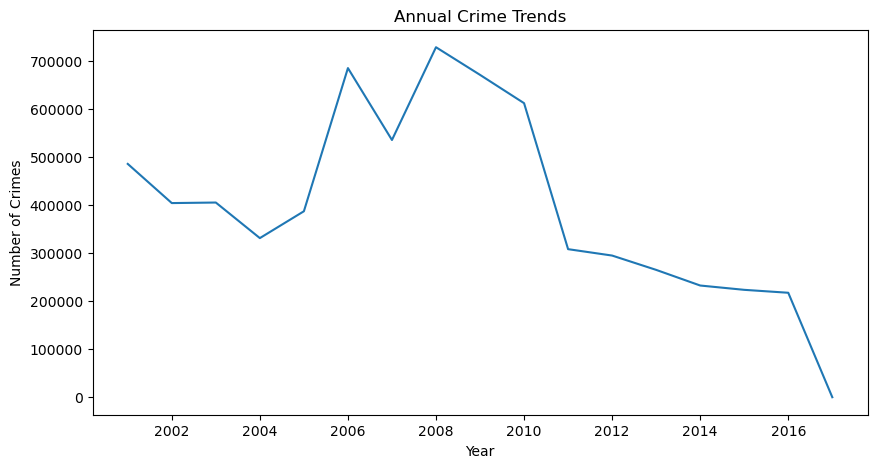

In [58]:
# Some visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting annual crimes
plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_crimes)
plt.title('Annual Crime Trends')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()